In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import keras
import numpy as np
import math
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
image_size = [IMAGE_SIZE, IMAGE_SIZE]
CHANNELS=3
EPOCHS=5
train_path = r"/content/drive/MyDrive/Final"
# test_path = r"D:\data\test"

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 920 files belonging to 5 classes.


In [6]:
class_names = dataset.class_names
class_names

['healthy', 'looseSmut', 'rootRot', 'septoria', 'stripeRust']

In [7]:
from pathlib import Path
import imghdr

data_dir = train_path
image_extensions = [".png", ".jpg", ".jpeg", ".gif"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/drive/MyDrive/Final/rootRot/00251.jpg is not an image
/content/drive/MyDrive/Final/healthy/00101.jpg is not an image
/content/drive/MyDrive/Final/healthy/01291.jpg is not an image
/content/drive/MyDrive/Final/healthy/00131.jpg is not an image


In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[0 2 1 3 4 4 2 0 2 1 1 1 4 0 2 1 1 2 3 2 2 0 1 2 0 1 2 1 4 3 3 1]


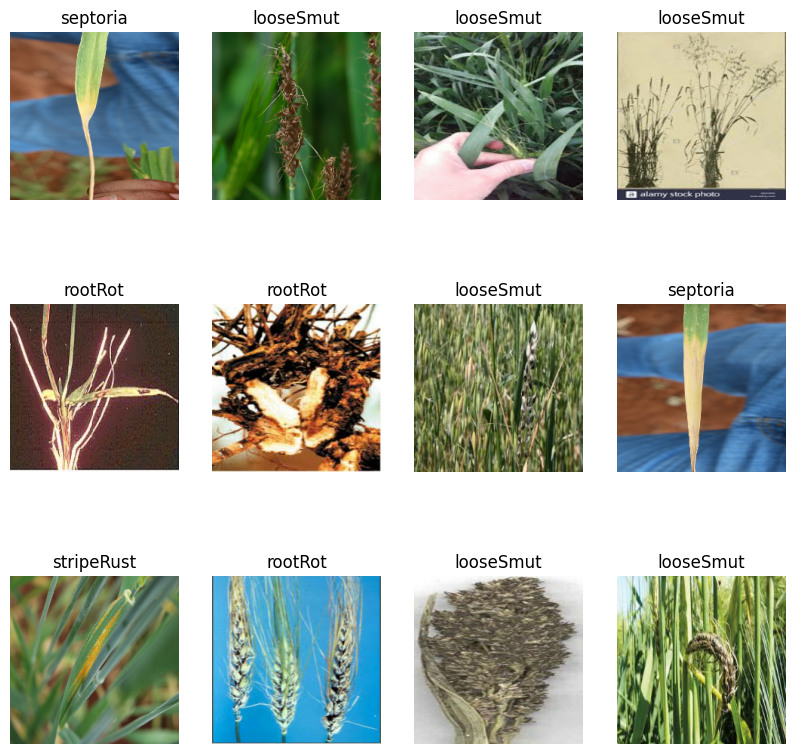

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
inception_resnet = InceptionResNetV2(input_shape= image_size + [3] ,weights = 'imagenet',include_top = False)

for layer in inception_resnet.layers:
  layer.trainable = False


#folders = glob(r"C:\Users\Dell\Desktop\Notebook\dataset/*')

x = Flatten()(inception_resnet.output)

prediction = Dense(len(class_names),activation = 'softmax')(x)

model = Model(inputs = inception_resnet.input , outputs = prediction)

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model.build(input_shape=input_shape)

model.summary()

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

219055592/219055592 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.3 , horizontal_flip = True, validation_split=0.2)
# test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 32, shuffle = True, class_mode = 'categorical', subset='training')

test_set = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 32, shuffle = True , class_mode = 'categorical', subset='validation')

history = model.fit(training_set,
                    validation_data= test_set,
                    epochs = EPOCHS,
                    steps_per_epoch = len(training_set),
                    validation_steps =len(test_set))

Found 734 images belonging to 5 classes.
Found 180 images belonging to 5 classes.
Epoch 1/5
23/23 [==============================] - 212s 8s/step - loss: 3.9104 - accuracy: 0.5627 - val_loss: 2.9930 - val_accuracy: 0.6167
Epoch 2/5
23/23 [==============================] - 168s 7s/step - loss: 1.1764 - accuracy: 0.8052 - val_loss: 2.6578 - val_accuracy: 0.7111
Epoch 3/5
23/23 [==============================] - 164s 7s/step - loss: 0.8699 - accuracy: 0.8488 - val_loss: 2.4475 - val_accuracy: 0.6722
Epoch 4/5
23/23 [==============================] - 164s 7s/step - loss: 0.4136 - accuracy: 0.9019 - val_loss: 1.8052 - val_accuracy: 0.7500
Epoch 5/5
23/23 [==============================] - 161s 7s/step - loss: 0.4333 - accuracy: 0.9019 - val_loss: 2.2374 - val_accuracy: 0.7111


In [12]:
scores = model.evaluate(test_set)

6/6 [==============================] - 27s 4s/step - loss: 2.2778 - accuracy: 0.7333


In [13]:
scores

[2.2777554988861084, 0.7333333492279053]

In [14]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 23}

In [15]:
history.history['loss'][:5]

[3.9103844165802,
 1.1764094829559326,
 0.8698545098304749,
 0.41355419158935547,
 0.43334826827049255]

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

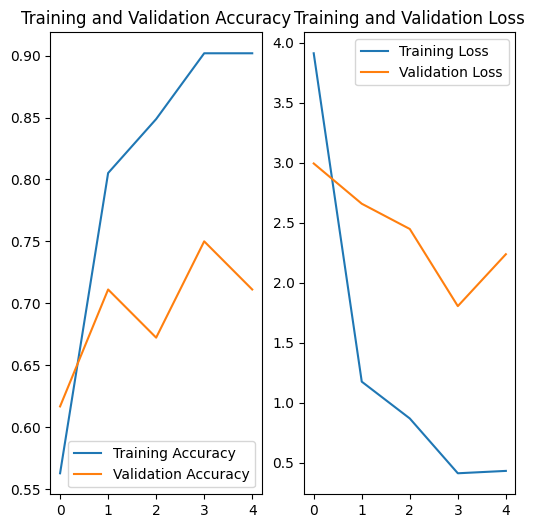

In [17]:
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
# image_path = r"C:\Users\Dell\Downloads\images.jpg"
image_path = r"/content/drive/MyDrive/Final/rootRot/00041.jpg"
img = image.load_img(image_path,target_size = (224,224))
x = image.img_to_array(img)

x = np.expand_dims(x,axis= 0)

img_data = preprocess_input(x)

classes = model.predict(img_data)

predicted_class = class_names[np.argmax(classes[0])]
confidence = round(100 * (np.max(classes[0])), 2)
print(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")

1/1 [==============================] - 5s 5s/step
Predicted: rootRot.
 Confidence: 93.13%


In [20]:
model.save('fyp.h5')

In [22]:
import os

os.getcwd()

'/content'

In [23]:
model.save_weights('weights.h5')